Put the data excel file in the same directory of the code

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import os

In [2]:
if not os.path.exists('output_figures'):
    os.mkdir('output_figures')

In [3]:
data = pd.read_excel('Dataset_muSORS.xlsx', sheet_name='Fig. 3a')

In [4]:
age = data['Age'][1:].to_numpy().astype('float')
bmi = data['BMI'][1:].to_numpy().astype('float')

In [5]:
sns.set_theme()
sns.set_style('white')

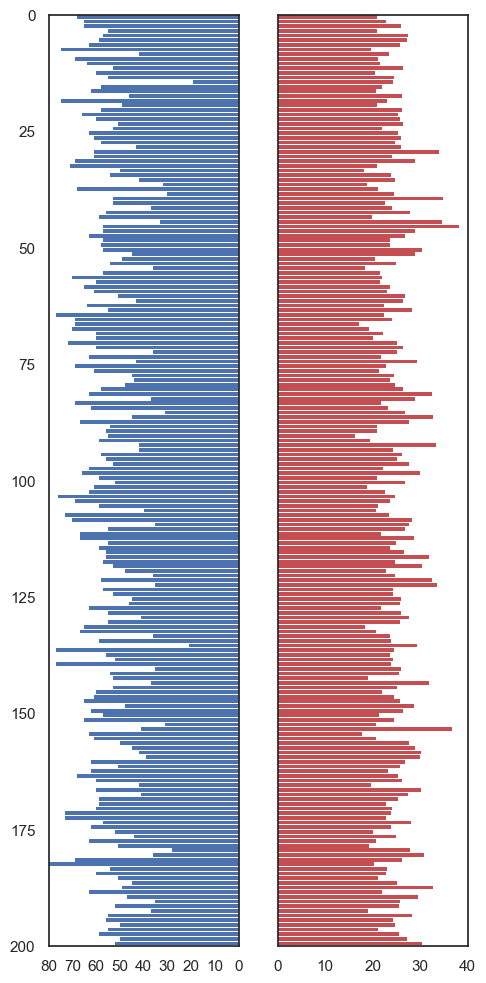

In [6]:
fig, axes = plt.subplots(figsize=(5,10), ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(np.arange(200)+0.5, age[:200], edgecolor='none', facecolor='b')
axes[1].barh(np.arange(200)+0.5, bmi[:200], edgecolor='none', facecolor='r')
axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[1].invert_yaxis()
axes[0].set_xticks(np.arange(9)*10)
axes[1].set_xticks(np.arange(5)*10)
axes[0].set_xlim([0,80])
axes[1].set_xlim([0,40])
axes[0].set_ylim([0,200])
axes[1].set_ylim([0,200])
axes[0].invert_xaxis()
axes[0].invert_yaxis()
plt.savefig('output_figures/age_bmi_D.pdf')

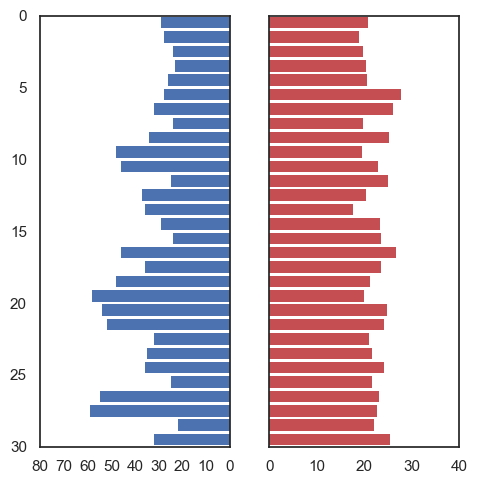

In [7]:
fig, axes = plt.subplots(figsize=(5,5), ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(np.arange(30)+0.5, age[201:], edgecolor='none', facecolor='b')
axes[1].barh(np.arange(30)+0.5, bmi[201:], edgecolor='none', facecolor='r')
axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[1].invert_yaxis()
axes[0].set_xticks(np.arange(9)*10)
axes[1].set_xticks(np.arange(5)*10)
axes[0].set_xlim([0,80])
axes[1].set_xlim([0,40])
axes[0].set_ylim([0,200])
axes[1].set_ylim([0,30])
axes[0].invert_xaxis()
axes[0].invert_yaxis()
plt.savefig('output_figures/age_bmi.pdf')

In [8]:
def gamma_XYZ2RGB(x):
    if x>0.0031308:
        return (1.055*np.power(x,(1/2.4))-0.055)
    else:
        return x*12.92

def XYZ2RGB(X, Y, Z):
    
    RR =  3.2404542 * X - 1.5371385 * Y - 0.4985314 * Z 
    GG = -0.9692660 * X + 1.8760108 * Y + 0.0415560 * Z  
    BB =  0.0556434 * X - 0.2040259 * Y + 1.0572252 * Z  
 
    RR = gamma_XYZ2RGB(RR)
    GG = gamma_XYZ2RGB(GG)
    BB = gamma_XYZ2RGB(BB)
 
    R = np.minimum((RR*255.0+0.5), 255)#CLIP255(RR*255.0+0.5)
    G = np.minimum((GG*255.0+0.5), 255)#CLIP255(GG*255.0+0.5)
    B = np.minimum((BB*255.0+0.5), 255)#CLIP255(BB*255.0+0.5)
 
    return R, G, B

Xn = 0.950456
Yn = 1.0
Zn = 1.088754

def Lab2XYZ(L, a, b): 

    fY = (L + 16.0) / 116.0; 
    fX = a / 500.0 + fY;
    fZ = fY - b / 200.0; 
 
    if np.power(fY, 3.0) > 0.008856:
        Y = np.power(fY, 3.0)
    else:
        Y = (fY-4./29)/7.787

    if np.power(fX,3) > 0.008856:
        X = fX * fX * fX;  
    else: 
        X = (fX - 4./29) / 7.787

    if np.power(fZ,3.0) > 0.008856:
        Z = fZ * fZ * fZ;  
    else:
        Z = (fZ - 4./29) / 7.787

    X = X * Xn
    Y = Y * Yn
    Z = Z * Zn
    
    return X,Y,Z

def Lab2RGB(L, a, b):
    X,Y,Z = Lab2XYZ(L, a, b)
    R, G, B = XYZ2RGB(X, Y, Z)
    return R, G, B

In [9]:
skin_data = pd.read_excel('Dataset_muSORS.xlsx', sheet_name='Fig. 3b')

In [10]:
skin_color = skin_data[['v_l', 'v_a', 'v_b']].to_numpy()
subject_id = skin_data['Subject ID']
left_right = skin_data['hand'].to_numpy()
subject_number = np.array([int(x[1:]) if not pd.isnull(x) else np.nan for x in subject_id])
subject_type = np.array([x[0] if not pd.isnull(x) else np.nan for x in subject_id])

In [11]:
skin_color_left_d = np.array([np.mean(skin_color[(subject_number == i) & (left_right == 'L') & (subject_type == 'D'), :], axis=0) 
                              for i in range(1, 201)])
skin_color_right_d = np.array([np.mean(skin_color[(subject_number == i) & (left_right == 'R') & (subject_type == 'D'), :], axis=0) 
                               for i in range(1, 201)])

C:\Users\work\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\work\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [12]:
RGB_left_d = [Lab2RGB(skin_color_left_d[i, 0], skin_color_left_d[i, 1], skin_color_left_d[i, 2]) 
              for i in range(skin_color_left_d.shape[0])]
RGB_right_d = [Lab2RGB(skin_color_right_d[i, 0], skin_color_right_d[i, 1], skin_color_right_d[i, 2]) 
               for i in range(skin_color_right_d.shape[0])]
RGB_left_d[15] = [255,255,255]
RGB_right_d[15] = [255,255,255]

In [13]:
sns.set_theme()

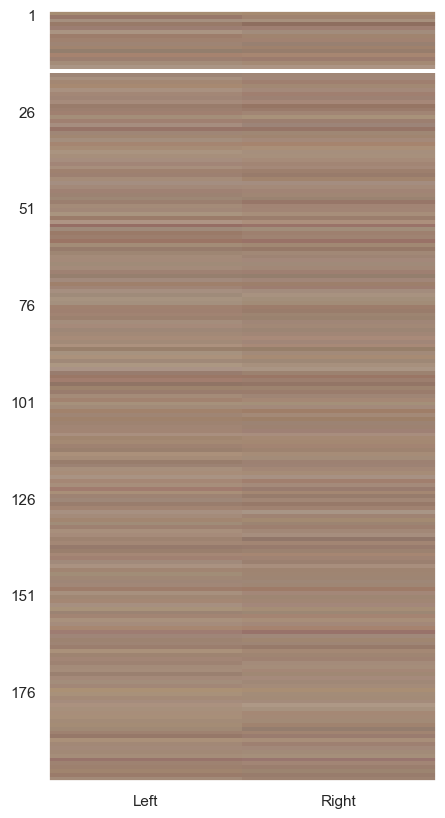

In [14]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, aspect=0.02)
for i in range(200):
    rect = patches.Rectangle((0, 1*i), 1, 1, facecolor=np.array(RGB_left_d[i])/255., edgecolor='none')
    ax.add_patch(rect)
    rect2 = patches.Rectangle((1, 1*i), 1, 1, facecolor=np.array(RGB_right_d[i])/255., edgecolor='none')
    ax.add_patch(rect2)
plt.xlim([0,2])
plt.ylim([0,199]);
ax.invert_yaxis()
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Left', 'Right'])
ax.set_yticks(1+np.arange(8)*25)
ax.set_yticklabels((1+np.arange(8)*25).tolist())
plt.savefig('output_figures/skin_color_d.pdf')

In [15]:
skin_color_left_n = np.array([np.mean(skin_color[(subject_number == i) & (left_right == 'L') & (subject_type == 'N'), :], axis=0) 
                              for i in range(1, 31)])
skin_color_right_n = np.array([np.mean(skin_color[(subject_number == i) & (left_right == 'R') & (subject_type == 'N'), :], axis=0) 
                               for i in range(1, 31)])

In [16]:
RGB_left_n = [Lab2RGB(skin_color_left_n[i, 0], skin_color_left_n[i, 1], skin_color_left_n[i, 2]) 
              for i in range(skin_color_left_n.shape[0])]
RGB_right_n = [Lab2RGB(skin_color_right_n[i, 0], skin_color_right_n[i, 1], skin_color_right_n[i, 2]) 
               for i in range(skin_color_right_n.shape[0])]

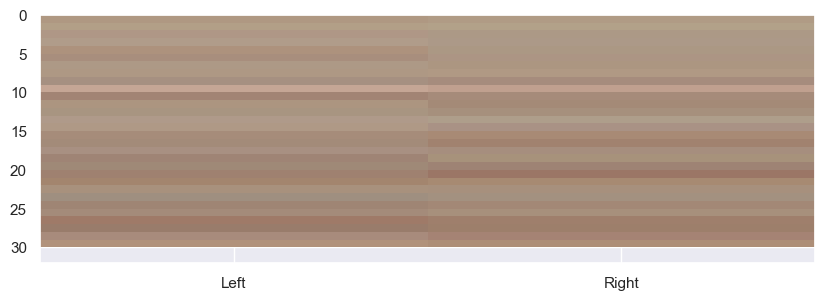

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, aspect=0.02)
for i in range(30):
    rect = patches.Rectangle((0, 1*i), 1, 1, facecolor=np.array(RGB_left_n[i])/255., edgecolor='none')
    ax.add_patch(rect)
    rect2 = patches.Rectangle((1, 1*i), 1, 1, facecolor=np.array(RGB_right_n[i])/255., edgecolor='none')
    ax.add_patch(rect2)
plt.xlim([0,2])
plt.ylim([0,32]);
ax.invert_yaxis()
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Left', 'Right'])
#ax.set_yticks(1+np.arange(8)*25)
#ax.set_yticklabels((1+np.arange(8)*25).tolist())
plt.savefig('output_figures/skin_color_n.pdf')